Sanity checking the CIC Emu to make sure nothing went wrong there. 

In [1]:
from pearce.emulator import NashvilleHot
from GPy.kern import *
import numpy as np
from os import path

In [2]:
import matplotlib
#matplotlib.use('Agg')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
training_file = '/scratch/users/swmclau2/cic_zheng07/PearceCICCosmo.hdf5'

In [4]:
em_method = 'gp'

In [5]:
fixed_params = {'z':0.0}

In [6]:
emu = NashvilleHot(training_file, fixed_params = fixed_params, downsample_factor = 0.1)

(array([], dtype=int64), array([], dtype=int64))


 /home/users/swmclau2/.local/lib/python2.7/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


In [8]:
test_file = '/home/users/swmclau2/scratch/cic_zheng07_test/PearceCICCosmoTest.hdf5'

In [9]:
pred_y, data_y = emu.goodness_of_fit(test_file, statistic = None)

(array([], dtype=int64), array([], dtype=int64))


In [10]:
print (np.abs(10**pred_y - 10**data_y)/(10**data_y)).mean(axis =1)

[ 0.0081741   0.05275454  0.09059981  0.90663142  1.8495807   1.7880789
  1.57151608  2.09898132  2.47575963  2.49523056  2.5816209   3.12937401
  2.7822579   2.02666178  2.31404589  2.14149046  1.52217616  1.90918367
  1.79273635  1.53751991]


In [23]:
idx = 100

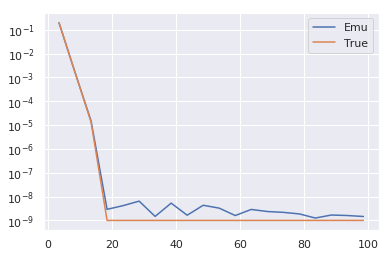

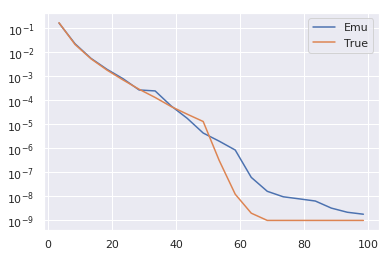

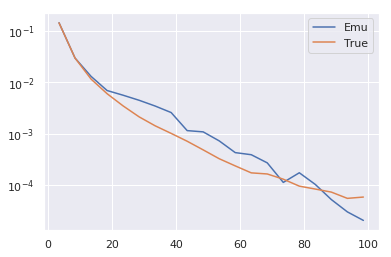

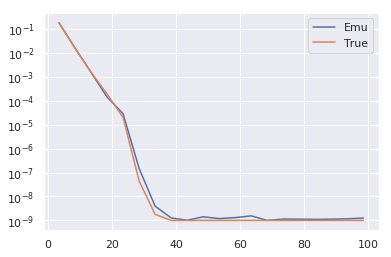

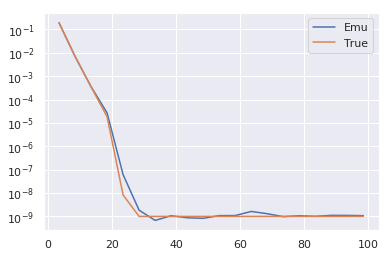

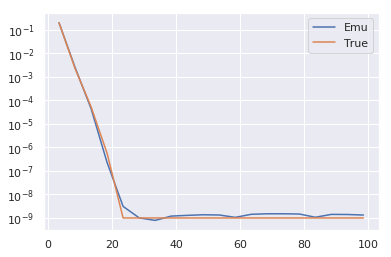

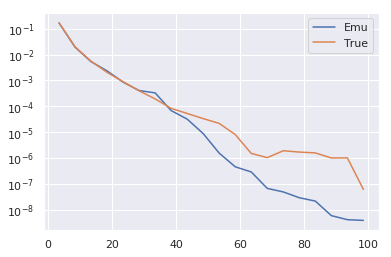

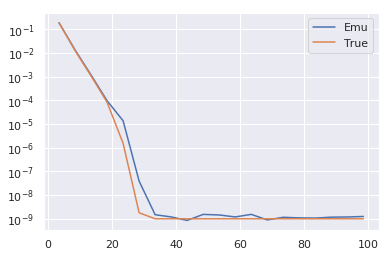

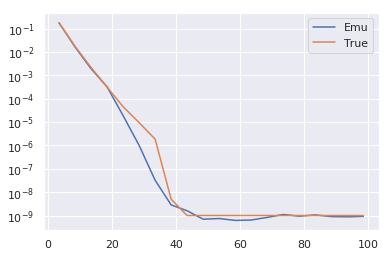

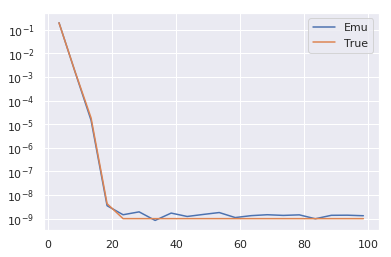

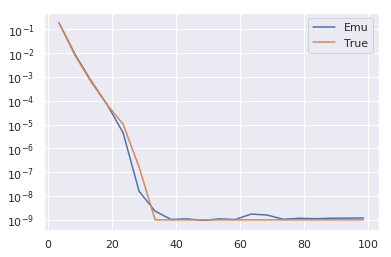

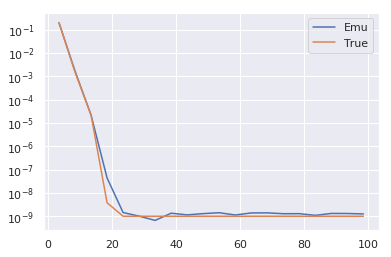

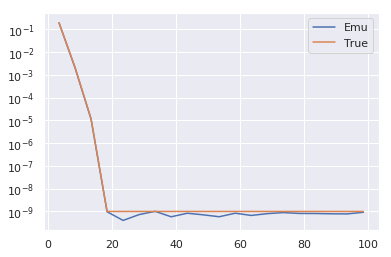

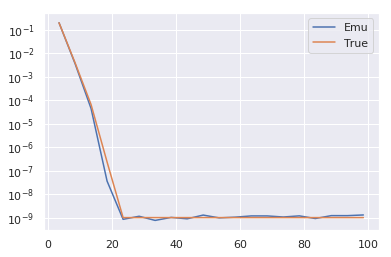

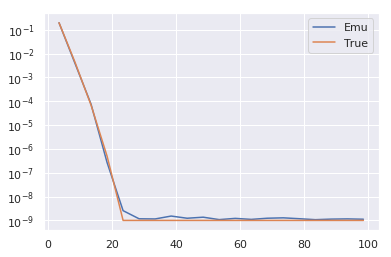

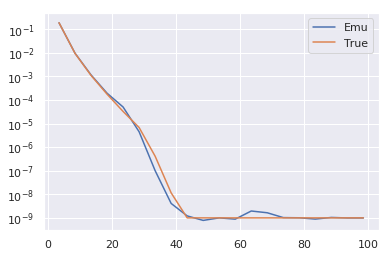

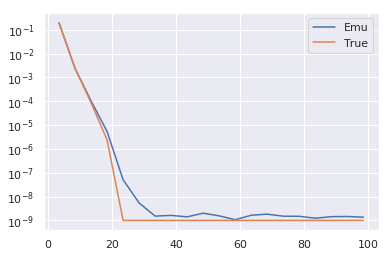

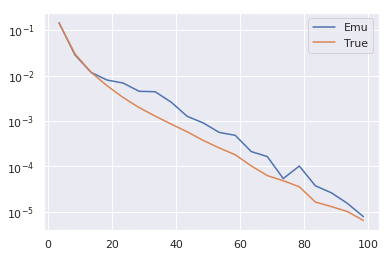

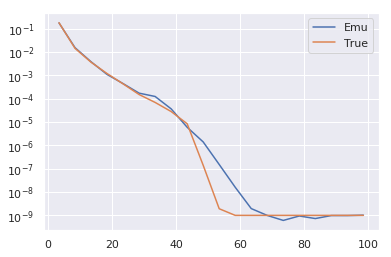

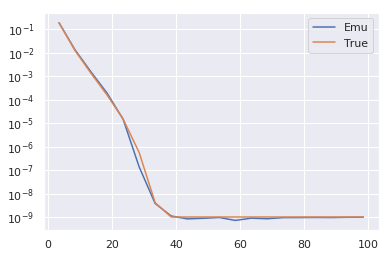

In [29]:
for idx in np.random.choice(pred_y.shape[1], 20, replace = False):
    plt.plot(emu.scale_bin_centers, 10**pred_y[:, idx], label = 'Emu')
    plt.plot(emu.scale_bin_centers, 10**data_y[:, idx], label = 'True')
    plt.yscale('log')
    plt.legend(loc = 'best')
    plt.show();

In [41]:
bins = np.logspace(0, 2, 15)
print bins
print np.round(bins)

[   1.            1.38949549    1.93069773    2.6826958     3.72759372
    5.17947468    7.19685673   10.           13.89495494   19.30697729
   26.82695795   37.2759372    51.79474679   71.9685673   100.        ]
[   1.    1.    2.    3.    4.    5.    7.   10.   14.   19.   27.   37.
   52.   72.  100.]


In [58]:
a = np.arange(1, 10, 1)
b = np.round(np.logspace(1., 2, 7)).astype(int)
c = np.r_[a, b]

In [59]:
c

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  15,  22,  32,
        46,  68, 100])